## 🧰 Step 1: Importing All Necessary Libraries

We’ll begin by importing the essential Python libraries for data manipulation, visualization, model building, and evaluation.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


## 📂 Step 2: Loading the Red Wine Quality Dataset

Now, we'll load the dataset and take a quick look at its structure to understand what we're working with.


In [2]:
df = pd.read_csv("/content/drive/MyDrive/winequality-red.csv")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 🧾 Step 3: Checking Dataset Info and Missing Values

We’ll inspect the data types, shape of the dataset, and confirm if there are any missing/null values.


In [3]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


## 📊 Step 4: Exploratory Data Analysis (EDA) – Looking at Feature Distributions

Let’s plot the distribution of each numerical feature to get an idea of their spread and skewness.


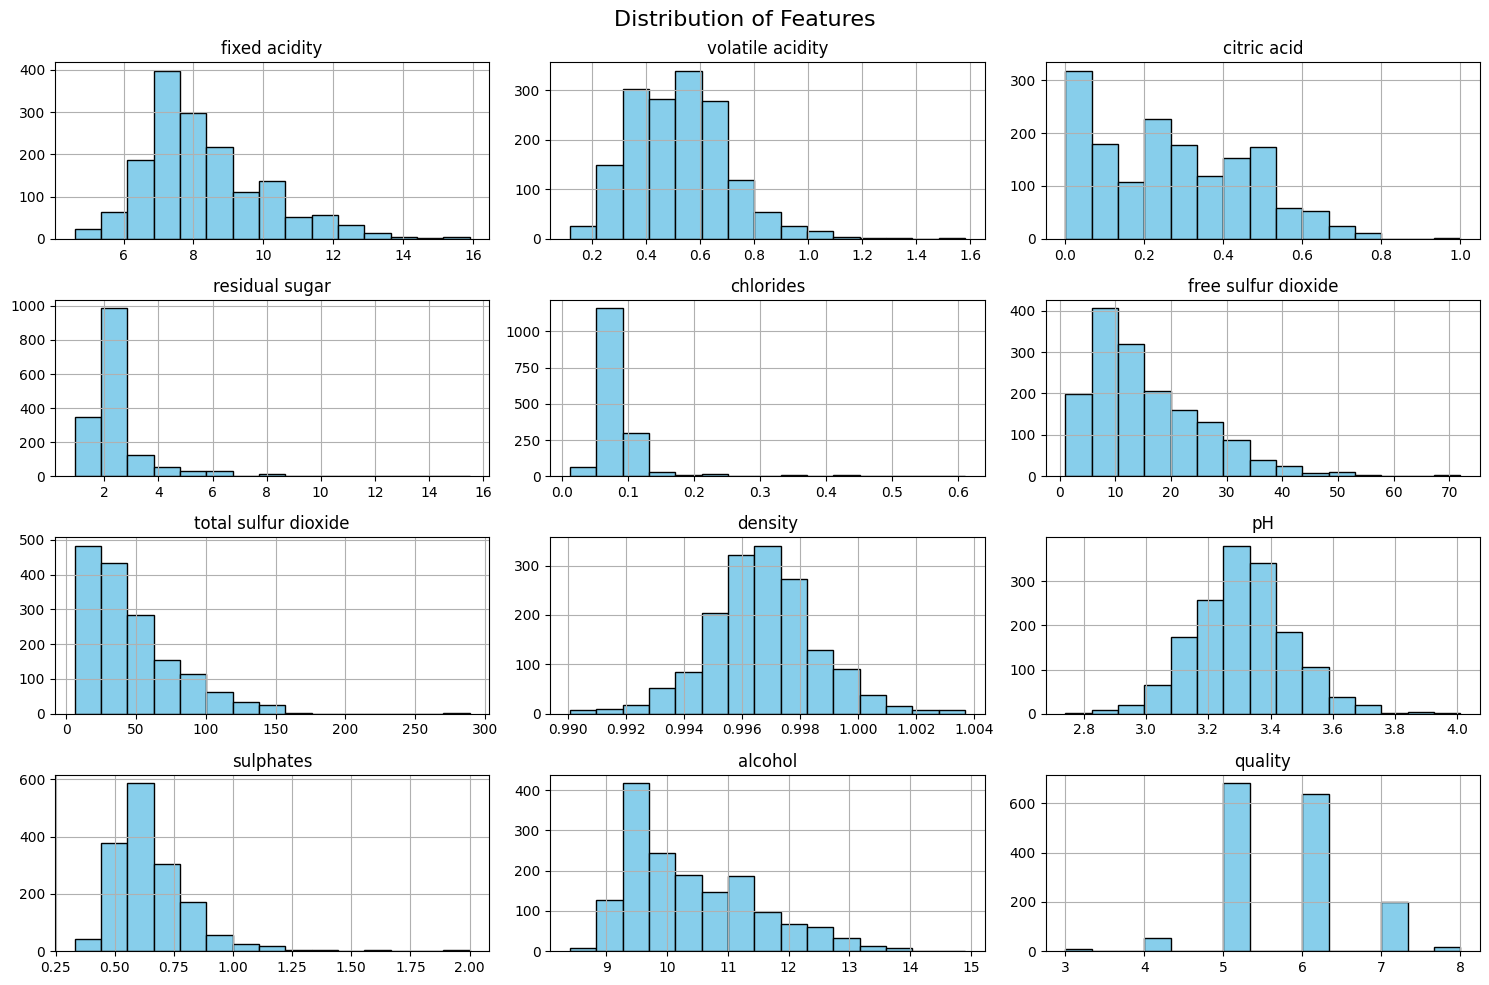

In [4]:
df.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Features", fontsize=16)
plt.tight_layout()
plt.show()


## 🔍 Step 5: Correlation Matrix

This heatmap helps us understand which features are strongly correlated with wine quality or with each other.


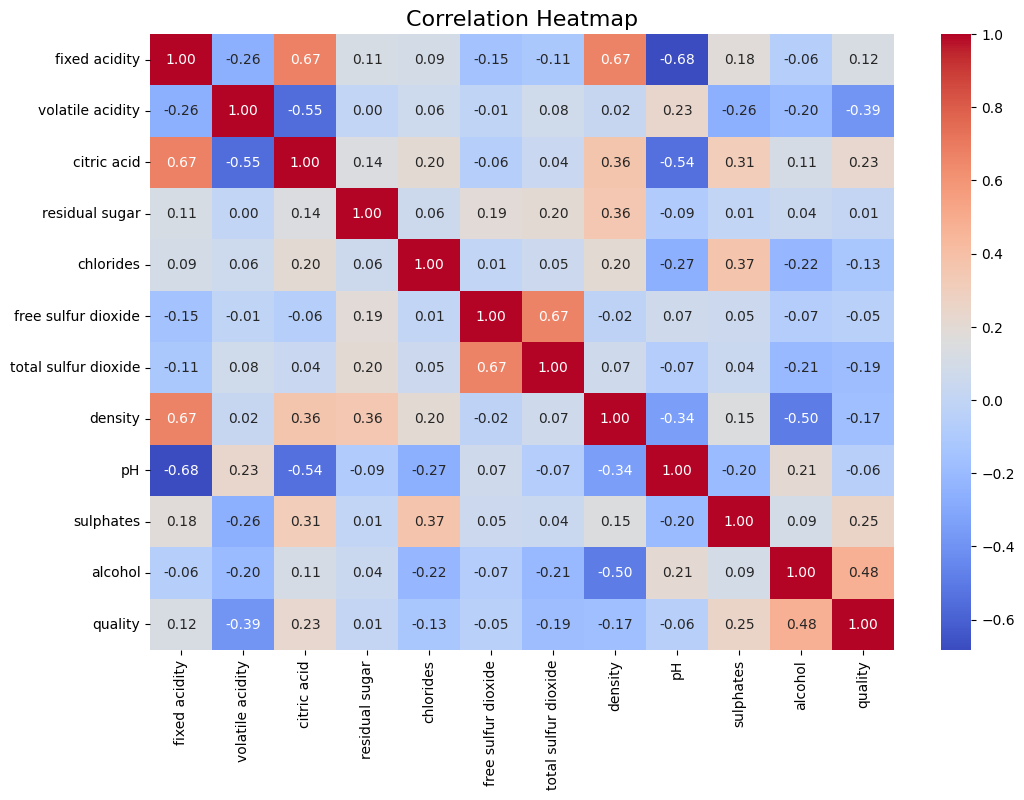

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


## 🏷️ Step 6: Binarizing Wine Quality

Since this dataset has quality scores ranging from 3 to 8, we’ll simplify the task into binary classification:
- Quality >= 7 → Good (1)
- Quality < 7 → Not Good (0)


In [6]:
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df['quality_label'].value_counts()


,count
quality_label,
0,1382
1,217


## 🧪 Step 7: Splitting Dataset into Training and Testing Sets

We'll split the features and the target variable, and then divide the dataset into 80% training and 20% testing.


In [7]:
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## 🌲 Step 8: Training a Random Forest Classifier

Time to fit the Random Forest model on the training data and let it learn the patterns.


In [8]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 📈 Step 9: Evaluating the Model's Performance

We'll now predict on the test set and evaluate the results using accuracy, classification report, and a confusion matrix.


In [9]:
y_pred = rf_model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy Score: {accuracy:.4f}")

# Classification Report
print("\n📄 Classification Report:\n")
print(classification_report(y_test, y_pred))


✅ Accuracy Score: 0.9437

📄 Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       277
           1       0.93      0.63      0.75        43

    accuracy                           0.94       320
   macro avg       0.94      0.81      0.86       320
weighted avg       0.94      0.94      0.94       320



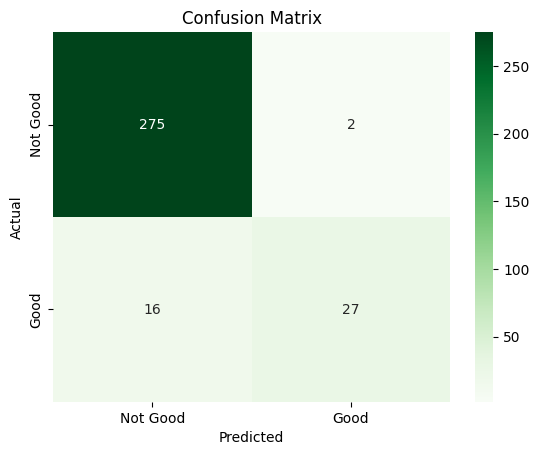

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens", xticklabels=['Not Good', 'Good'], yticklabels=['Not Good', 'Good'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 🧠 Step 10: Analyzing Feature Importances

Let’s see which features are most influential in predicting the wine quality.


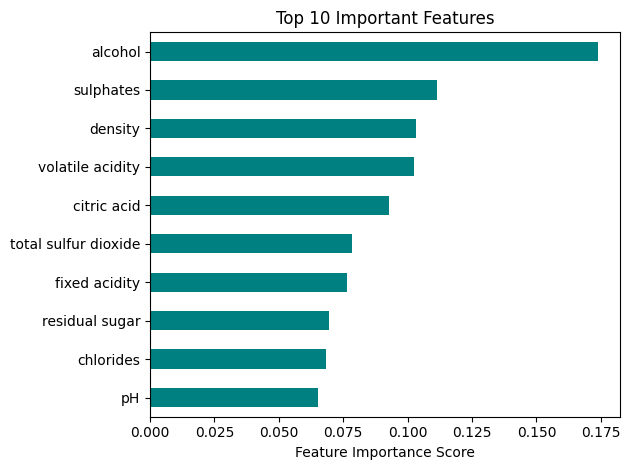

In [11]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).sort_values().plot(kind='barh', color='teal')
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()


## 💾 Saving the Trained Random Forest Model using Joblib

We'll save the trained model to a `.pkl` file so it can be loaded later for predictions without retraining.


In [12]:
import joblib

# Save the model to a file
joblib.dump(rf_model, "random_forest_wine_quality.pkl")

print("✅ Model saved as random_forest_wine_quality.pkl")


✅ Model saved as random_forest_wine_quality.pkl
